In [1]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set Start date and end date
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')
# Get Apple,CISCO,IBM and Amazon Stock data
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [3]:
# Cumulative Daily Returns for each time period

for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [4]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [5]:
# Position values for an initial investment of $1,000,000
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [6]:
# Get Position values for all stocks

all_position_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]
portfolio_value = pd.concat(all_position_vals,axis=1)

In [7]:
portfolio_value.columns = ['AAPL Position','CSCO Position','IBM Position','AMZN Position']

In [8]:
portfolio_value['Total Position'] = portfolio_value.sum(axis=1)


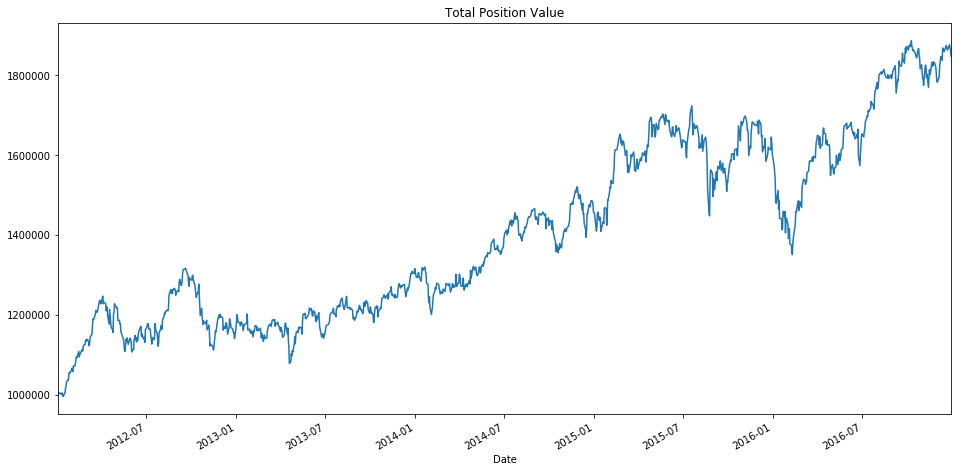

In [9]:
portfolio_value['Total Position'].plot(figsize=(16,8))
plt.title('Total Position Value');

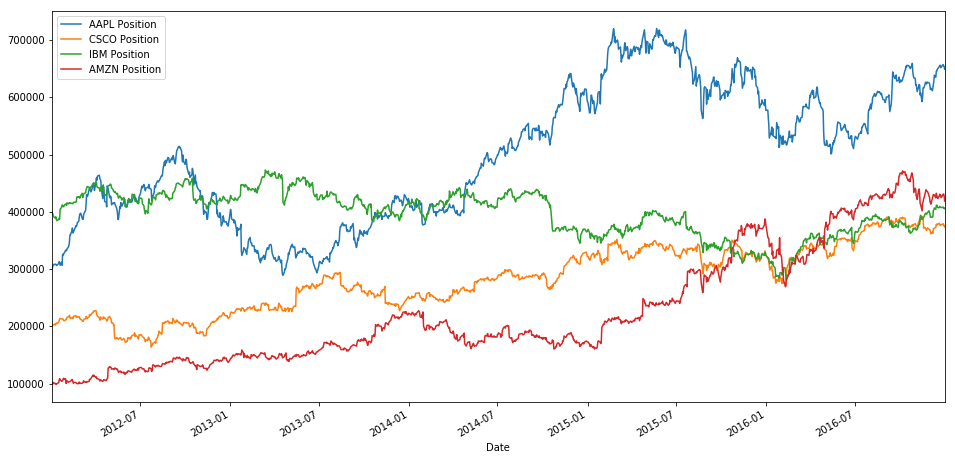

In [10]:
portfolio_value.drop('Total Position',axis=1).plot(figsize=(16,8));

In [11]:
portfolio_value.head()

,AAPL Position,CSCO Position,IBM Position,AMZN Position,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [12]:
# Daily Return
portfolio_value['Daily Return'] = portfolio_value['Total Position'].pct_change(1)

In [13]:
portfolio_value['Daily Return'].mean()

0.0005442330716215244

In [14]:
portfolio_value['Daily Return'].std()

0.010568287769161725

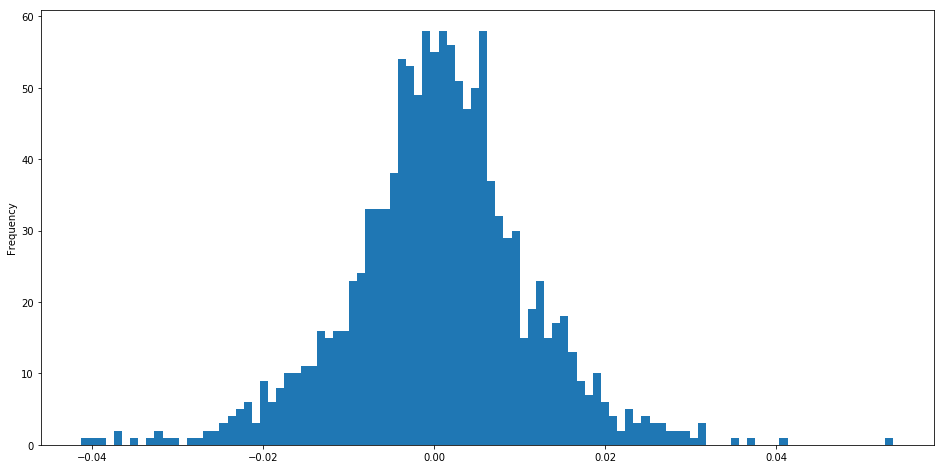

In [15]:
portfolio_value['Daily Return'].plot(kind='hist',bins = 100,figsize=(16,8))

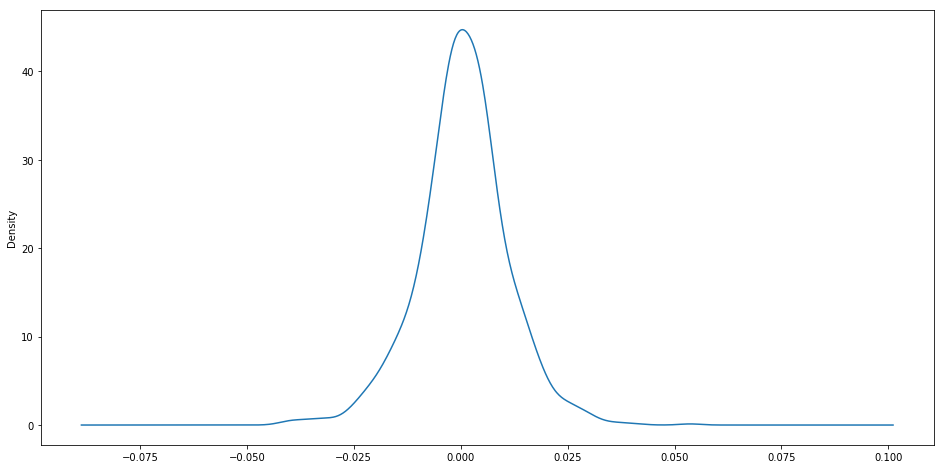

In [16]:
portfolio_value['Daily Return'].plot(kind = 'kde',figsize=(16,8))

In [17]:
cumulative_return  = 100 * (portfolio_value['Total Position'][-1] / portfolio_value['Total Position'][0] - 1)

In [18]:
# Calculating Sharpe Ratio
# R(f),Risk free rate is zero
# Daily Return
SR = portfolio_value['Daily Return'].mean() / portfolio_value['Daily Return'].std()

In [19]:
SR

0.05149680662648089

In [20]:
#Annualized Sharpe Ratio
ASR = (252 ** 0.5) * SR

In [21]:
ASR

0.817486461885909

In [22]:
# ASR > 2, very good portfolio

In [23]:
import numpy as np

In [24]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)

In [25]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis = 1)
stocks.columns = ['AAPL','CISCO','IBM','AMZN']

In [26]:
stocks.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [27]:
stocks.pct_change(1).mean()

AAPL     0.000750
CISCO    0.000599
IBM      0.000081
AMZN     0.001328
dtype: float64

In [28]:
# Pearson Coefficient
stocks.pct_change(1).corr()

,AAPL,CISCO,IBM,AMZN
AAPL,1.000000,0.301990,0.297498,0.235487
CISCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
AMZN,0.235487,0.284470,0.258492,1.000000


In [29]:
log_ret = np.log(stocks/stocks.shift(1))

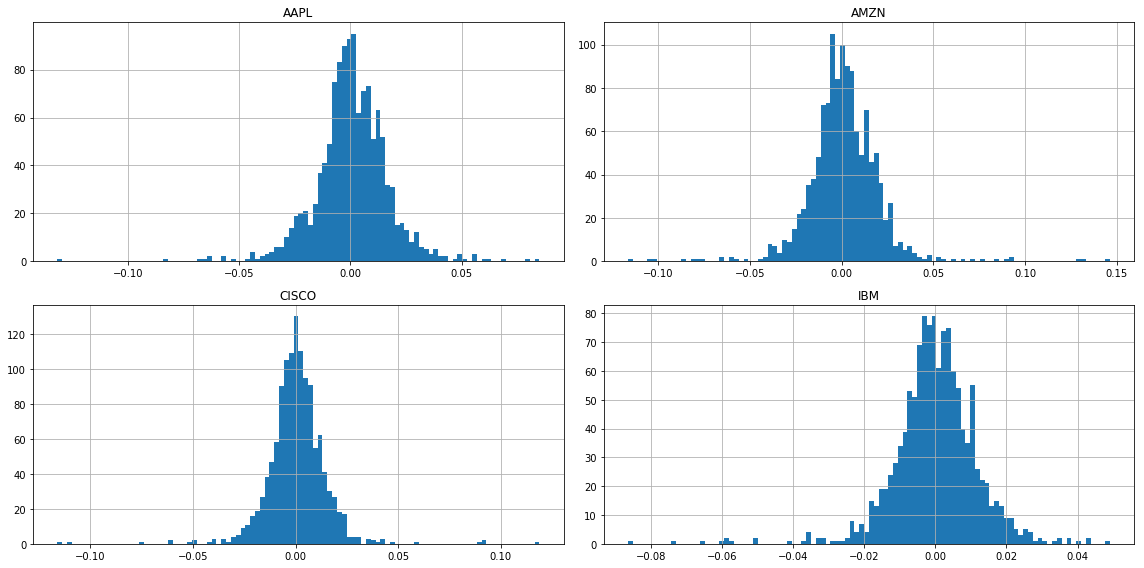

In [30]:
log_ret.hist(bins = 100,figsize=(16,8))
plt.tight_layout()

In [31]:
log_ret.cov() * 252

,AAPL,CISCO,IBM,AMZN
AAPL,0.068326,0.017854,0.014464,0.018986
CISCO,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
AMZN,0.018986,0.019956,0.014939,0.094470


In [32]:
# Random weights for allocation
np.random.seed(101)
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # Get random weights
    weights = np.array(np.random.random(4))
    
    # Normalise weights
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    
    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252,weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]


In [33]:
print ("Maximum Sharpe Ratio : {} at index : {}".format(sharpe_arr.max(),sharpe_arr.argmax()))

Maximum Sharpe Ratio : 1.03032605513 at index : 1420


In [34]:
# Get the weights for the maximum sharpe ratio
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

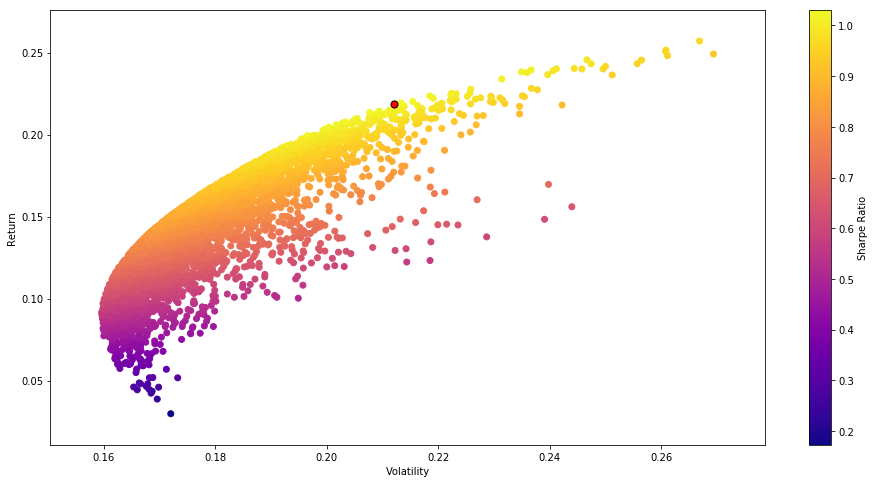

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c = sharpe_arr,cmap='plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(vol_arr[1420],ret_arr[1420],c='red',s=50,edgecolor='black')

In [38]:
# Mathematical optimisation

def get_volatility_ratio(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [39]:
from scipy.optimize import minimize

In [49]:
# To minimize the negative sharpe ratio

def neg_sharpe(weights):
    return get_volatility_ratio(weights)[2] * -1

In [50]:
# Constraints

# Return 0 if the sum of the weights is 1
def checksum(weights):
    return np.sum(weights) - 1

In [51]:
# Equation constraint of function check sum
cons = ({'type':'eq','fun' : checksum})
# Bounds of the individual weights [0,1]
bounds = ((0,1),(0,1),(0,1),(0,1))
# Initial Guesses
init_guess = [0.25,0.25,0.25,0.25]

In [52]:
# Sequential Least Squares Minimisation

opt_results = minimize(neg_sharpe,init_guess,method = 'SLSQP',bounds = bounds,constraints = cons)

In [53]:
opt_results

     fun: -1.0307168703360359
     jac: array([ 5.64157963e-05,  4.18275595e-05,  3.39921713e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289767e-01, 2.04189819e-01, 6.93482815e-17, 5.29520414e-01])

In [54]:
# Optimal results array for the portfolio
opt_results.x

array([2.66289767e-01, 2.04189819e-01, 6.93482815e-17, 5.29520414e-01])

In [56]:
# Optimal Daily Returns,Volatility Ratio and Sharpe Ratio

# Matches with the previous answer by simulation of 5000 values

get_volatility_ratio(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [57]:
# Efficient Frontier
# Also known as Markowitz portfolio optimisation
# Best returns for given risk

frontier_y = np.linspace(0,0.3,100)
def minimise_vol(weights):
    return get_volatility_ratio(weights)[1]
frontier_vol = []

# Constraints on sum of weights and returns - all possible returns

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':checksum},{'type':'eq','fun':lambda w: get_volatility_ratio(w)[0] - possible_return})
    result = minimize(minimise_vol,init_guess,method='SLSQP',bounds = bounds,constraints = cons)
    frontier_vol.append(result['fun'])

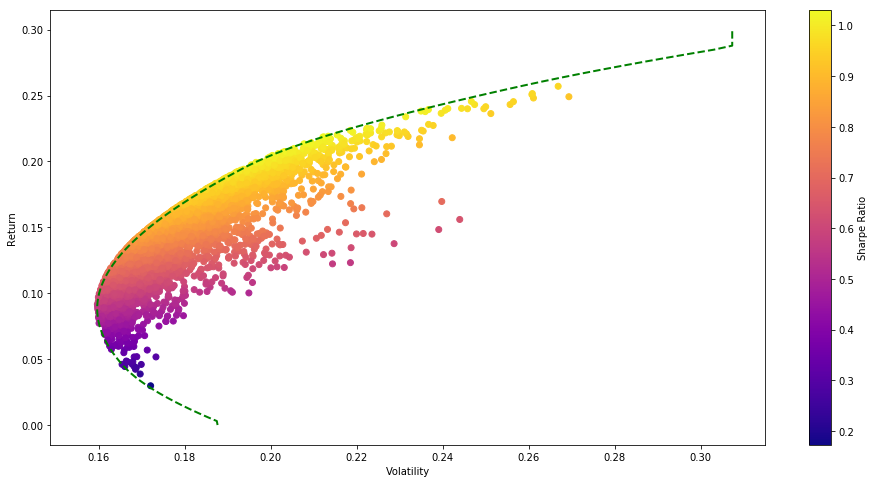

In [61]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c = sharpe_arr,cmap='plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_vol,frontier_y,'g--',linewidth=2);